In [624]:
import numpy as np
import pandas as pd

In [625]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Data-Analytics/A1/Indian Earthquakes List Update_Magnitudes (1).csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,7,9,10,11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [626]:
data

,Sl. No.,YEAR,MONTH,DATE,ORIGIN TIME (UTC),(IST),MAGNITUDE (Mw),Mw,Mb,Mb.1,Ms,ML,LAT (N),LONG (E),DEPTH (km),INTENSITY (MM),MMI,MME,LOCATION,REFERENCE
0,1,-2474,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
1,2,-325,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,3,25,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,4,26,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
4,5,26,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,6.075520196,5.999685205,26,97,80.0,NaN,NaN,NaN,Myanmar,G-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52984,52970,2019,7,28.0,19:24:08,00:54:08/2019-07-29/,3.2000,3.2,NaN,3.07428,2.32377,2.91501,32.8�N,78.4�E,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN
52985,52971,2019,7,28.0,10:44:10,16:14:10,3.6000,3.6,NaN,3.43659,2.78301,3.33473,25.5�N,90.4�E,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52986,52972,2019,7,28.0,21:25:06,7/29/2019 2:55,4.0000,4,NaN,3.79891,3.24225,3.75446,23.2�N,86.5�E,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52987,52973,2019,7,29.0,3:33:53,9:03:53,4.3000,4.3,NaN,4.07065,3.58668,4.06925,32.8�N,76.4�E,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


## Data Cleaning
A lot of data cleaning is required. 
- Useless columns such Sl. No.,etc needs to be removed.
- NaN values
- Wrong values such as 0 value in date, month, etc.
- Latitudes and Longitudes also in the end contain some symbols in the string.
- Inconsistent data type in some columns
- The metadata such as year, month have unnecessary space before the comma `,` the space was removed from csv. Due to this `data['YEAR']` can be used instead of `data['YEAR ']` (Notice the space).

In [627]:
# Null count in each column
# data.isna().sum()
data.isna().sum(axis = 0)

Sl. No.                  0
YEAR                     0
MONTH                   18
DATE                    57
ORIGIN TIME (UTC)    31803
(IST)                52563
MAGNITUDE (Mw)       12054
Mw                    2504
Mb                   40706
Mb.1                  2492
Ms                     166
ML                     166
LAT (N)                  0
LONG (E)                 0
DEPTH (km)            2178
INTENSITY (MM)       52948
MMI                  52989
MME                  52989
LOCATION             43615
REFERENCE             1582
dtype: int64

In [628]:
data.columns

Index(['Sl. No.', 'YEAR', 'MONTH', 'DATE', 'ORIGIN TIME (UTC)', '(IST)',
       'MAGNITUDE (Mw)', 'Mw', 'Mb', 'Mb.1', 'Ms', 'ML', 'LAT (N)', 'LONG (E)',
       'DEPTH (km)', 'INTENSITY (MM)', 'MMI', 'MME', 'LOCATION', 'REFERENCE'],
      dtype='object')

In [629]:
# Removing columns which have most of the values null
drop = ['Sl. No.', 'ORIGIN TIME (UTC)', '(IST)',
       'MAGNITUDE (Mw)', 'Mb', 'Mb.1', 'Ms', 'ML',
        'INTENSITY (MM)', 'MMI', 'MME', 'LOCATION', 'REFERENCE']
new_data = data.drop(drop, axis=1)

# data.head()
new_data.tail()
# 'Mw', 'YEAR', 'MONTH', 'DATE', 'LAT (N)', 'LONG (E)', 'DEPTH (km)' are features that we are considering

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
52984,2019,7,28.0,3.2,32.8�N,78.4�E,10.0
52985,2019,7,28.0,3.6,25.5�N,90.4�E,70.0
52986,2019,7,28.0,4,23.2�N,86.5�E,22.0
52987,2019,7,29.0,4.3,32.8�N,76.4�E,20.0
52988,2019,7,31.0,3,20.0�N,72.8�E,10.0


In [630]:
new_data.isna().sum(axis = 0)

YEAR             0
MONTH           18
DATE            57
Mw            2504
LAT (N)          0
LONG (E)         0
DEPTH (km)    2178
dtype: int64

### Cleaning feature 1 by 1

#### Year

In [631]:
# dropping rows with Year<1800 because they will no longer be relevant
new_data = new_data[new_data['YEAR'] >= 1700]
new_data

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
42,1702,NaN,NaN,NaN,19.1,73.2,NaN
43,1705,02,4.0,7.0,72.15,21.75,0.0
44,1720,7,15.0,NaN,19.1,73.3,NaN
45,1720,07,15.0,6.5,77.1,28.37,0.0
46,1735,00,0.0,7.5,75,34,0.0
...,...,...,...,...,...,...,...
52984,2019,7,28.0,3.2,32.8�N,78.4�E,10.0
52985,2019,7,28.0,3.6,25.5�N,90.4�E,70.0
52986,2019,7,28.0,4,23.2�N,86.5�E,22.0
52987,2019,7,29.0,4.3,32.8�N,76.4�E,20.0


#### Month


In [632]:
# converting to numeric
new_data['MONTH'] = pd.to_numeric(new_data['MONTH'],errors='coerce').astype(pd.Int64Dtype())

new_data['MONTH'].value_counts()

1     6362
12    5366
3     4702
10    4649
4     4403
7     4160
2     4096
8     4066
5     3994
11    3941
6     3620
9     3557
0       15
Name: MONTH, dtype: Int64

In [633]:
# # Dropping month=0 rows
# rows = new_data[ new_data['MONTH'] == 0 ].index
# new_data.drop(rows, inplace = True)

# new_data['MONTH'].value_counts()

In [634]:
# Convert 0 to NaN
new_data['MONTH']=new_data['MONTH'].mask(new_data['MONTH']==0)

# # Filling NaN values with mean
# mean = np.floor(new_data['MONTH'].mean())
# new_data['MONTH'].fillna(value=mean, inplace=True)

# new_data.isna().sum(axis = 0)

#### Date

In [635]:
# convert to numeric & date=0 to NaN & NaN to mean

new_data['DATE'] = pd.to_numeric(new_data['DATE'],errors='coerce').astype(pd.Int64Dtype())
new_data['DATE']=new_data['DATE'].mask(new_data['DATE']==0)

# mean = np.floor(new_data['DATE'].mean())
# new_data['DATE'].fillna(value=mean, inplace=True)

# new_data.isna().sum(axis = 0)

#### Mw

In [636]:
import re
# Mw is an object
# Converting everything to float
new_data = new_data.reset_index(drop=True)
del_row=[]
for i in range(len(new_data)):
   row=new_data.iloc[i]
   if bool(re.match('^[0123456789.]+$',str(row['Mw'])))==False:
     if pd.isnull((row['Mw']))==False:
        del_row.append(i)

new_data=new_data.drop(del_row,axis=0)
new_data = new_data.reset_index(drop=True)
new_data['Mw']=new_data['Mw'].astype(float)
new_data.head()

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
0,1702,<NA>,<NA>,NaN,19.1,73.2,NaN
1,1705,2,4,7.0,72.15,21.75,0.0
2,1720,7,15,NaN,19.1,73.3,NaN
3,1720,7,15,6.5,77.1,28.37,0.0
4,1735,<NA>,<NA>,7.5,75,34,0.0


In [637]:
# # Filling NaN 
# mean = new_data['Mw'].mean()
# new_data['Mw'].fillna(value=mean, inplace=True)

# new_data.head()

#### LAT (N)

In [638]:
# dtype = object -> float
# converting S to N & removing the chars, symbols
lat=[]
for i in range(len(new_data)):
   row=new_data.iloc[i]
   if bool(re.match('^[0123456789.]+$',str(row['LAT (N)'])))==False:
      f=0
      if 'S' in str(row['LAT (N)']):
        f=1

      inst=re.sub(r"[�NSE?]",'',str(row['LAT (N)']))
      inst=re.sub(r"[,]",'.',inst)
      if f:
         lat.append(-1*float(str(inst)))
      else:
         lat.append(float(str(inst)))
   else:
      lat.append(float(str(row['LAT (N)'])))

In [639]:
new_data['LAT (N)']=lat
new_data['LAT (N)'].isna().sum()

# mean = new_data['LAT (N)'].mean()
# new_data['LAT (N)'].fillna(value=mean, inplace=True)

0

#### Longitude

In [640]:
long=[]
for i in range(len(new_data)):
   row=new_data.iloc[i]
   if bool(re.match('^[0123456789.]+$',str(row['LONG (E)'])))==False:
      f=0
      if 'W' in str(row['LONG (E)']):
        f=1;
      inst=re.sub(r"[�NSE?W]",'',str(row['LONG (E)']))
      inst=re.sub(r"[,]",'.',inst)
      if f:
         long.append(-1*float(str(inst)))
      else:
         long.append(float(str(inst)))
   else:
     long.append(float(str(row['LONG (E)'])))
new_data['LONG (E)'] = long
new_data

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
0,1702,<NA>,<NA>,NaN,19.10,73.20,NaN
1,1705,2,4,7.0,72.15,21.75,0.0
2,1720,7,15,NaN,19.10,73.30,NaN
3,1720,7,15,6.5,77.10,28.37,0.0
4,1735,<NA>,<NA>,7.5,75.00,34.00,0.0
...,...,...,...,...,...,...,...
52939,2019,7,28,3.2,32.80,78.40,10.0
52940,2019,7,28,3.6,25.50,90.40,70.0
52941,2019,7,28,4.0,23.20,86.50,22.0
52942,2019,7,29,4.3,32.80,76.40,20.0


In [641]:
# mean = new_data['LONG (E)'].mean()
# new_data['LONG (E)'].fillna(value=mean, inplace=True)

#### Depth

In [642]:
# # Filling NaN
# mean = new_data['DEPTH (km)'].mean()
# new_data['DEPTH (km)'].fillna(value=mean,inplace=True)
# new_data

# Dropping rows with NaN value
new_data = new_data.dropna(axis=0, how='all', subset=['DEPTH (km)'])
# new_data['DEPTH (km)'].isna().sum()
new_data

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
1,1705,2,4,7.0,72.15,21.75,0.0
3,1720,7,15,6.5,77.10,28.37,0.0
4,1735,<NA>,<NA>,7.5,75.00,34.00,0.0
5,1736,3,24,5.8,74.50,34.60,0.0
7,1737,10,11,7.2,88.40,22.60,0.0
...,...,...,...,...,...,...,...
52939,2019,7,28,3.2,32.80,78.40,10.0
52940,2019,7,28,3.6,25.50,90.40,70.0
52941,2019,7,28,4.0,23.20,86.50,22.0
52942,2019,7,29,4.3,32.80,76.40,20.0


### Handling NaN
All the NaN replaced by mean

In [643]:
new_data.dtypes

YEAR            int64
MONTH           Int64
DATE            Int64
Mw            float64
LAT (N)       float64
LONG (E)      float64
DEPTH (km)    float64
dtype: object

In [644]:
# Feature processing
# We will use float type in year, month, date to fill NaN
new_data['YEAR']=new_data['YEAR'].astype(float)
new_data['MONTH']=new_data['MONTH'].astype(float)
new_data['DATE']=new_data['DATE'].astype(float)

new_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
1,1705.0,2.0,4.0,7.0,72.15,21.75,0.0
3,1720.0,7.0,15.0,6.5,77.10,28.37,0.0
4,1735.0,NaN,NaN,7.5,75.00,34.00,0.0
5,1736.0,3.0,24.0,5.8,74.50,34.60,0.0
7,1737.0,10.0,11.0,7.2,88.40,22.60,0.0


In [645]:
new_data = new_data.fillna(new_data.mean())
new_data.head()

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
1,1705.0,2.000000,4.000000,7.0,72.15,21.75,0.0
3,1720.0,7.000000,15.000000,6.5,77.10,28.37,0.0
4,1735.0,6.334397,16.426181,7.5,75.00,34.00,0.0
5,1736.0,3.000000,24.000000,5.8,74.50,34.60,0.0
7,1737.0,10.000000,11.000000,7.2,88.40,22.60,0.0


### Setting Parameters

In [646]:
from sklearn.model_selection import train_test_split

X = new_data
X = X.drop('Mw',axis=1)
X = X.drop('DATE',axis=1)

# threshold for Mw earthquake
phi = 4.5 
y = [0 if i<phi else 1 for i in new_data['Mw']]

# test:train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# depth parameter for decision tree
dpt = 7

## Task 1
Plot ROC for both these classifiers for K as parameter in KNN, pre-prune depth as a parameter in Decision Tree and number of estimators as parameter in ensemble learning

### Decision Trees

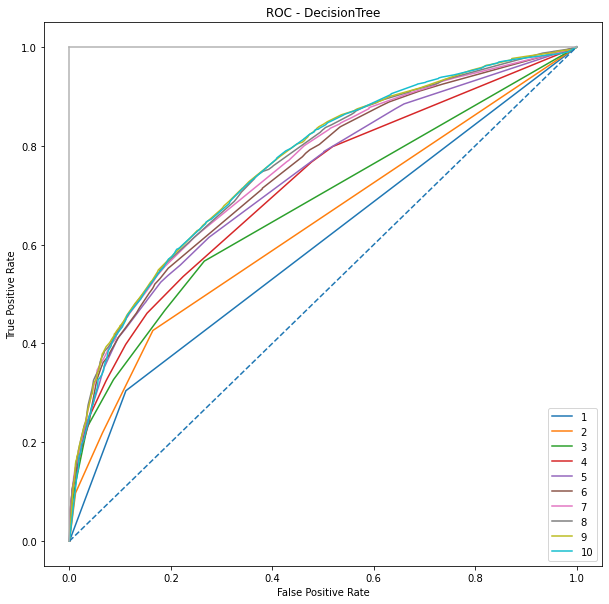

Best Depth with max area:  9
Roc_score 0.7622229084579758


In [647]:
# ROC Curve 
import matplotlib.pyplot as plt

dec_max,dec_ind,dec_predict = 0,0,0

plt.figure(figsize=(10,10))  
for dpt in range(1,11):
  dtc = DecisionTreeClassifier(criterion="entropy",max_depth=dpt)
  dtc.fit(X_train,y_train)
  dec_probas = dtc.predict_proba(X_test)

  if dec_max < roc_auc_score(y_test, dec_probas[:,1]):
    dec_ind = dpt
    dec_max = roc_auc_score(y_test, dec_probas[:,1])
    dec_predict = dtc.predict(X_test) # to be used ahead to calculate accuracy,recall,etc

  false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, dec_probas[:,1])
  plt.plot(false_positive_rate1, true_positive_rate1, label=str(dpt))
  plt.legend()

plt.title('ROC - DecisionTree')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Best Depth with max area: ", dec_ind)
print("Roc_score",dec_max)

In [648]:
# visualizing decision tree on tree.dot file
from sklearn.tree import export_graphviz

y_pd = pd.DataFrame({'col':y})
y_pd['col'] = y_pd['col'].apply(str)

# feature_cols = ['YEAR','MONTH','DATE','LAT (N)','LONG (E)','DEPTH (km)']
feature_cols = X.columns

export_graphviz( dtc, out_file="tree.dot", feature_names=feature_cols, 
                class_names=y_pd['col'].unique(), rounded=True, filled=True )

### KNN

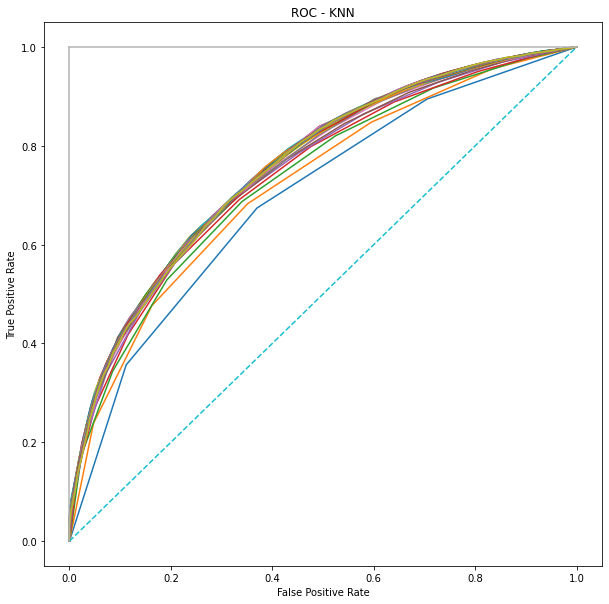

43 0.7611081197206732


In [649]:
from sklearn.neighbors import KNeighborsClassifier

knn_max,knn_ind,knn_predict = 0,0,0
plt.figure(figsize=(10,10))  

for k in range(3,100,2):
  knn = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  knn.fit(X_train,y_train)

  knn_probas = knn.predict_proba(X_test)
  if knn_max < roc_auc_score(y_test, knn_probas[:,1]):
    knn_ind = k
    knn_max = roc_auc_score(y_test, knn_probas[:,1])
    knn_predict = knn.predict(X_test)

  fpr2, tpr2, threshold2 = roc_curve(y_test, knn_probas[:,1])
  plt.plot(fpr2, tpr2)

plt.title('ROC - KNN')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(knn_ind,knn_max)

### Ensemble learning

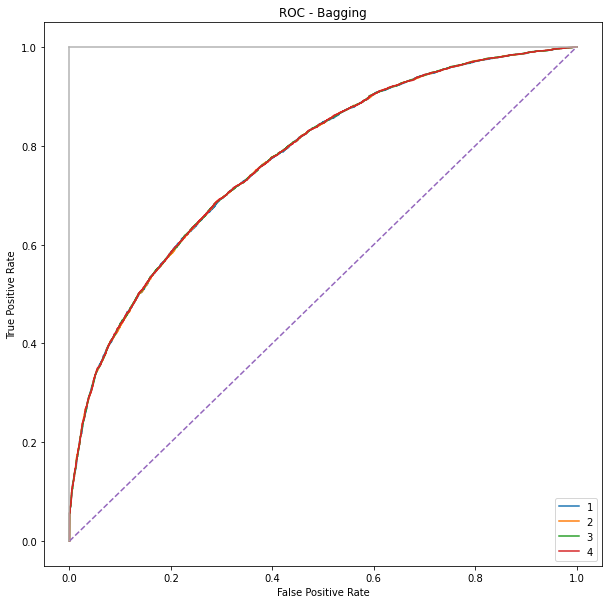

3 0.7737081300764435


In [650]:
from sklearn.ensemble import BaggingClassifier

bag_max,bag_ind,bag_predict = 0,0,0
plt.figure(figsize=(10,10))

for i in range(1,5):
  num = i*500
  bag_clf = BaggingClassifier(DecisionTreeClassifier(criterion="entropy",max_depth=7), n_estimators=num, max_samples=4000, bootstrap=True)
  bag_clf.fit(X_train,y_train)

  bag_probas = bag_clf.predict_proba(X_test)

  if bag_max < roc_auc_score(y_test, bag_probas[:,1]):
    bag_ind = i
    bag_max = roc_auc_score(y_test, bag_probas[:,1])
    bag_predict = bag_clf.predict(X_test)

  fpr3, tpr3, threshold3 = roc_curve(y_test, bag_probas[:,1])
  plt.plot(fpr3, tpr3, label=str(i))
  plt.legend()

plt.title('ROC - Bagging')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(bag_ind,bag_max)

The no. of estimators are not affecting to that extend and the code was taking a lot of time so it has been tested on only a few numbers.

## Task 2
Which is the better classifier for this data amongst the three? Give Reasoning?

In [651]:
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,accuracy_score,precision_score,recall_score

In [657]:
# Scores for DecisionTree

print('roc_auc_score: ', dec_max)
print('recall score: ', recall_score(y_test, dec_predict))
print('precision score: ', precision_score(y_test, dec_predict))
print('f1 score: ', f1_score(y_test, dec_predict))

roc_auc_score:  0.7622229084579758
recall score:  0.6741472172351886
precision score:  0.7130875138471278
f1 score:  0.6930708298085058


In [658]:
# Scores for KNN

print('roc_auc_score: ', knn_max)
print('recall score: ', recall_score(y_test, knn_predict))
print('precision score: ', precision_score(y_test, knn_predict))
print('f1 score: ', f1_score(y_test, knn_predict))

roc_auc_score:  0.7611081197206732
recall score:  0.6926989826451226
precision score:  0.7069781646052833
f1 score:  0.699765737172221


In [659]:
# Scores for Ensemble

print('roc_auc_score: ', bag_max)
print('recall score: ', recall_score(y_test, bag_predict))
print('precision score: ', precision_score(y_test, bag_predict))
print('f1 score: ', f1_score(y_test, bag_predict))

roc_auc_score:  0.7737081300764435
recall score:  0.6970377019748654
precision score:  0.718094944512947
f1 score:  0.707409656847859


## Task 3
What could be the best possible values of the parameters for respective
classifier based on the ROC curves? Give Reasoning.

After looping in each of them we stored the best value according to roc areas covered by them in {dec_ind,dec_max}, {knn_ind,knn_max}, {bag_ind,bag_max}

In [655]:
print("Decision Tree best depth at ", dec_ind, "with area", dec_max)
print("KNN best k = ", knn_ind, "with area", knn_max)
print("Ensemble(Bagging) best no of estimators at ", bag_ind, "with area", bag_max)

Decision Tree best depth at  9 with area 0.7622229084579758
KNN best k =  43 with area 0.7611081197206732
Ensemble(Bagging) best no of estimators at  3 with area 0.7737081300764435


## Task 4
If you have to choose only a subset of two features to predict earthquake,
which ones would it be? Give reasoning.

In [660]:
for i in X.columns:
  # print(i)
  for j in X.columns:
    if i !=j:
      df=pd.DataFrame()
      df['first']=X[i]
      df['second']=X[j]
      x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=72)
      sc = StandardScaler()
      x_train = sc.fit_transform(x_train)
      x_test = sc.transform(x_test)
      
      bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=1500, max_samples=1000)
      bagging.fit(x_train,y_train)
      bag_prob_predict=bagging.predict_proba(x_test)
      bag_label_predict=bagging.predict(x_test)
      print(i,j)
      print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, bag_prob_predict[:,1]))
      print('f1 score for DecisionTree: ', f1_score(y_test, bag_label_predict))
      print('precision score for DecisionTree: ', precision_score(y_test, bag_label_predict))
      print('recall score for DecisionTree: ', recall_score(y_test, bag_label_predict))
      print("Accuracy:",metrics.accuracy_score(y_test, bag_label_predict))

YEAR MONTH
roc_auc_score for Logistic Regression:  0.7005825346852319
f1 score for DecisionTree:  0.637319405819711
precision score for DecisionTree:  0.691899852724595
recall score for DecisionTree:  0.5907204828366655
Accuracy: 0.6489857546116983
YEAR LAT (N)
roc_auc_score for Logistic Regression:  0.7503815772747309
f1 score for DecisionTree:  0.6977506143280195
precision score for DecisionTree:  0.6992927506946198
recall score for DecisionTree:  0.696215264679995
Accuracy: 0.6850915774962253
YEAR LONG (E)
roc_auc_score for Logistic Regression:  0.747714517501862
f1 score for DecisionTree:  0.6977607324013361
precision score for DecisionTree:  0.6867161816632168
recall score for DecisionTree:  0.7091663523198793
Accuracy: 0.6792489988840018
YEAR DEPTH (km)
roc_auc_score for Logistic Regression:  0.7251339946360693
f1 score for DecisionTree:  0.6738554672720393
precision score for DecisionTree:  0.6759013282732448
recall score for DecisionTree:  0.6718219539796303
Accuracy: 0.6604739